### Imports

In [65]:
import numpy as np
import pandas as pd
import os
import scipy
from scipy import stats, signal
import pickle
import re
import matplotlib.pyplot as plt

import time

import warnings
warnings.filterwarnings("ignore")

### Load DataFrames

In [2]:
dlc_parent = os.path.join(os.getcwd(), 'dlc')

In [48]:
mice_name = ["caf99", "kdr48", "caf42", "caf26"]

body_parts = ['base_tail', 'body_core', 'headstage', 'left_ear', 'right_ear', 'snout']

dlc_names = {"caf99" : "CAF00099-20210608T040846-050846DLC_resnet50_caf26_caf42_caf99_kdr48Jul12shuffle1_1030000.h5",
            "kdr48" : "KDR00048_Top-20220502T201307-211308DLC_resnet50_caf26_caf42_caf99_kdr48Jul12shuffle1_1030000.h5",
            "caf42" : "e3v81a6-20200915T022243-032244DLC_resnet50_caf26_caf42_caf99_kdr48Jul12shuffle1_1030000.h5",
            "caf26" : "e3v81a8-20200808T0609-0709DLC_resnet50_caf26_caf42_caf99_kdr48Jul12shuffle1_1030000.h5"}

In [4]:
#given the dlc h5 path, a dataframe is read in, coordinates are normalized
def load_dlc(dlc_path):
    dlc_df = pd.read_hdf(dlc_path)
    scorer = dlc_df.columns.levels[0][0]
    dlc_df = dlc_df[scorer]
    
    return dlc_df

### Find NaN

In [17]:
from itertools import groupby
from collections import defaultdict

def find_groups(arr):
    i = 0
    result = defaultdict(list)
    for k, g in groupby(arr):
        elems = len(list(g))
        result[k].append((i, i+elems-1))
        i += elems
    
    return result

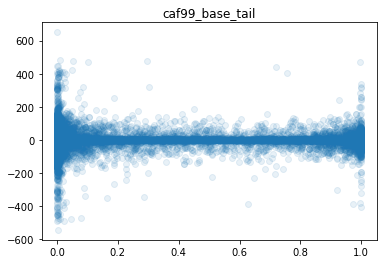

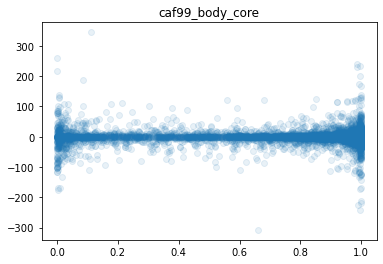

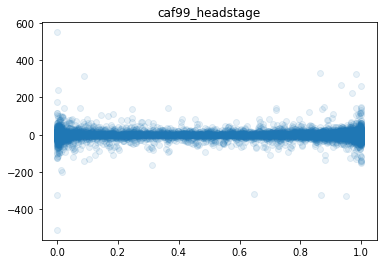

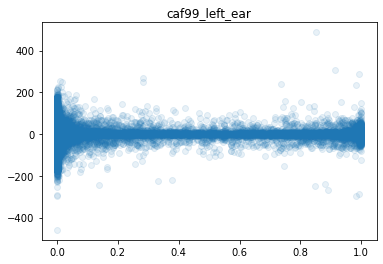

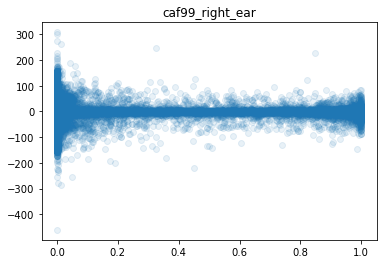

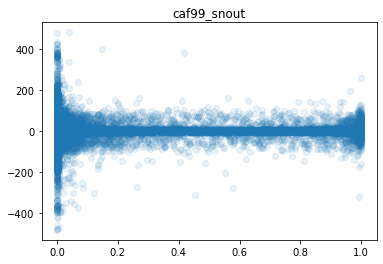

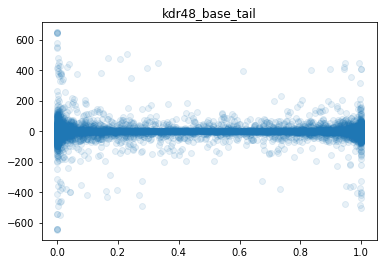

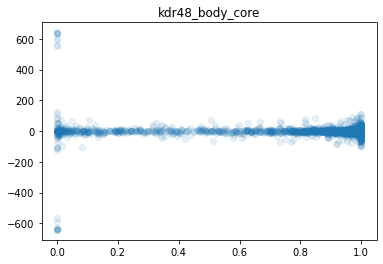

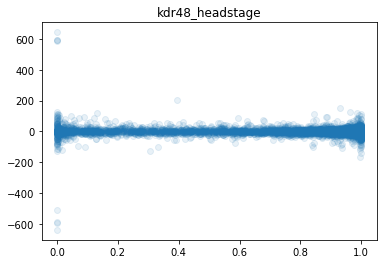

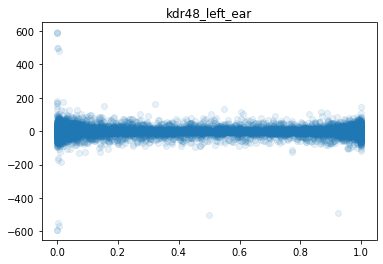

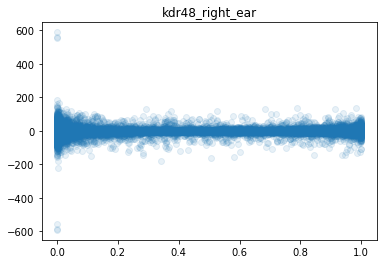

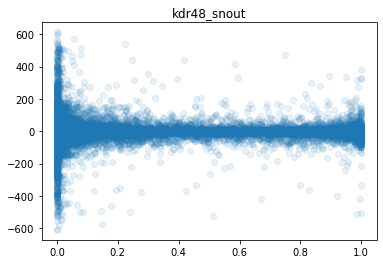

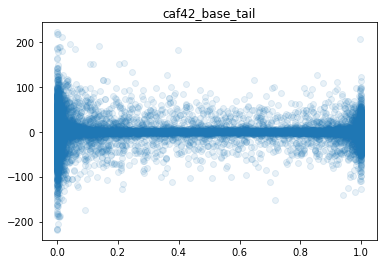

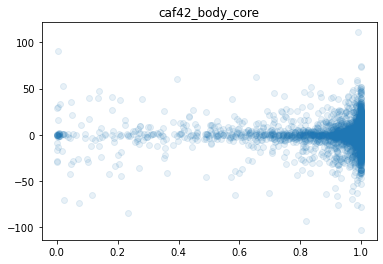

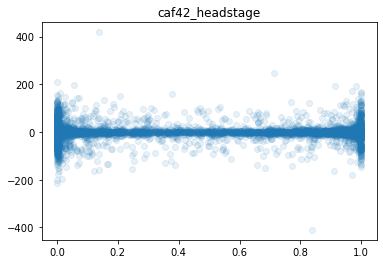

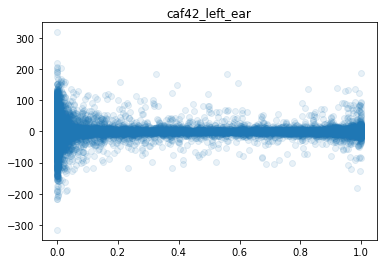

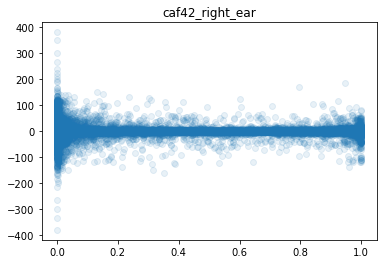

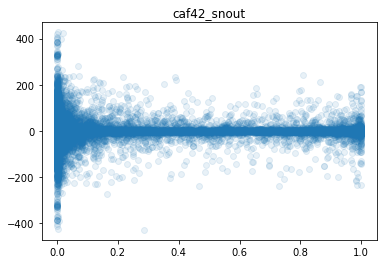

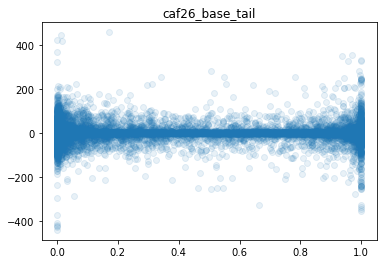

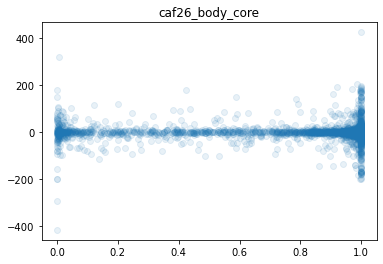

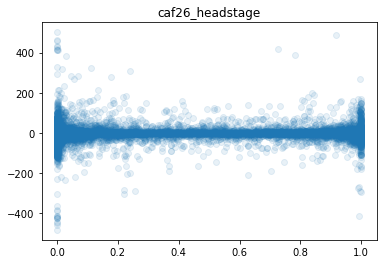

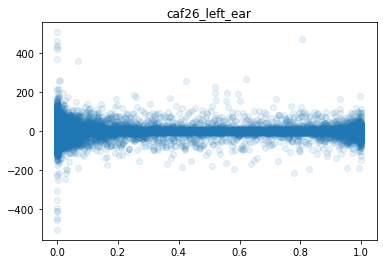

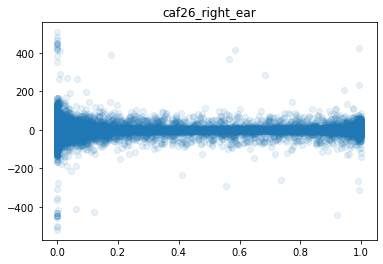

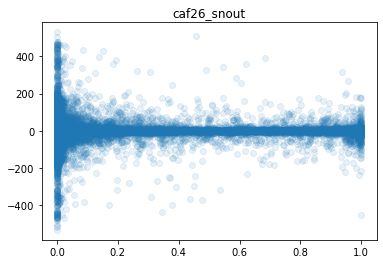

In [78]:
for mouse in mice_name:
    
    dlc_df = load_dlc(os.path.join(dlc_parent, dlc_names[mouse]))
    
    for part in body_parts:
        
        diff = np.diff(dlc_df[part]['x'].values)
        llhd = dlc_df[part]['likelihood'].values[1:]
        
        plt.figure()
        plt.title(f'{mouse}_{part}')
        plt.scatter(x = llhd, y = diff, alpha = 0.1)
        plt.show()